# Phân chia dữ liệu ảnh tư thế em bé

Notebook này sẽ:
1. Đọc dữ liệu ảnh từ 3 thư mục con: `nam_nghieng`, `nam_ngua`, `nam_sap` trong thư mục "data_baby_posture"
2. Hiển thị số lượng ảnh trong mỗi thư mục
3. Chia dữ liệu thành tập train, val, test với tỉ lệ 70:15:15
4. Tạo cấu trúc thư mục mới theo yêu cầu

In [4]:
# Import các thư viện cần thiết
import os
import shutil
import random
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Thiết lập đường dẫn
# Đường dẫn gốc của dự án
root_path = Path('d:/GiaoPhan_Workspace/sem_6/pbl5/baby_posture_analysis')

# Đường dẫn thư mục chứa dữ liệu gốc
data_source_path = root_path / 'data_baby_posture'

# Đường dẫn thư mục đích để lưu dữ liệu đã chia
data_dest_path = root_path / 'data'

# Tạo thư mục đích nếu chưa tồn tại
if not data_dest_path.exists():
    os.makedirs(data_dest_path)
    print(f"Đã tạo thư mục {data_dest_path}")
else:
    print(f"Thư mục {data_dest_path} đã tồn tại")

Thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data đã tồn tại


In [6]:
# Các lớp (classes) cần xử lý
classes = ['nam_nghieng', 'nam_ngua', 'nam_sap']

# Tạo dictionary để lưu danh sách tệp theo lớp
files_by_class = {}

# Đếm số lượng tệp trong mỗi thư mục
print("Số lượng ảnh trong mỗi thư mục:")
for class_name in classes:
    class_path = data_source_path / class_name
    if class_path.exists():
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        files_by_class[class_name] = image_files
        print(f"- {class_name}: {len(image_files)} ảnh")
    else:
        print(f"- {class_name}: Thư mục không tồn tại")
        files_by_class[class_name] = []

# Tổng số ảnh
total_images = sum(len(files) for files in files_by_class.values())
print(f"\nTổng số ảnh: {total_images}")

Số lượng ảnh trong mỗi thư mục:
- nam_nghieng: 134 ảnh
- nam_ngua: 156 ảnh
- nam_sap: 149 ảnh

Tổng số ảnh: 439


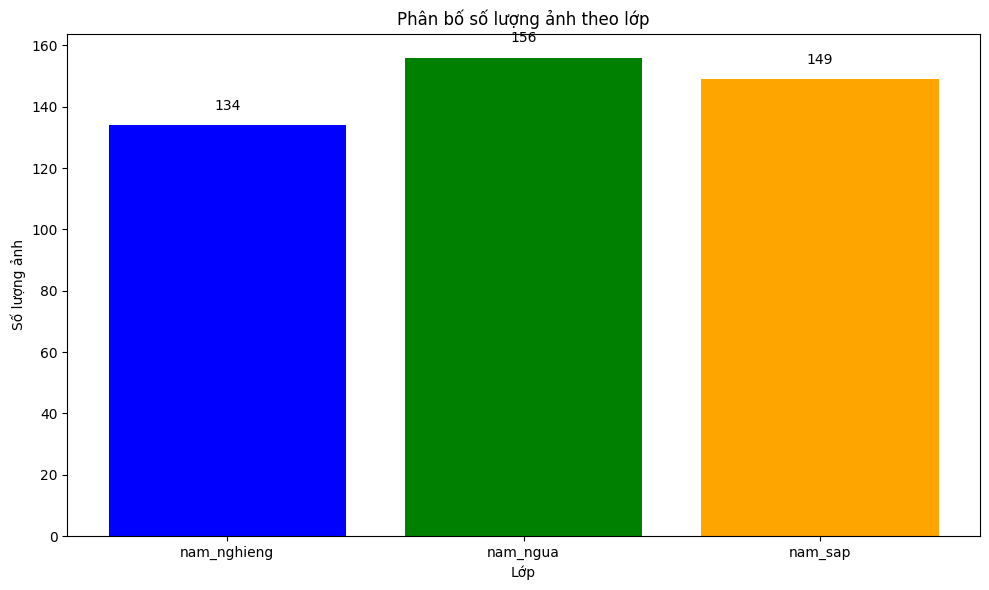

In [7]:
# Hiển thị biểu đồ phân bố dữ liệu
class_names = list(files_by_class.keys())
image_counts = [len(files_by_class[class_name]) for class_name in class_names]

plt.figure(figsize=(10, 6))
plt.bar(class_names, image_counts, color=['blue', 'green', 'orange'])
plt.title('Phân bố số lượng ảnh theo lớp')
plt.xlabel('Lớp')
plt.ylabel('Số lượng ảnh')
for i, count in enumerate(image_counts):
    plt.text(i, count + 5, str(count), ha='center')
plt.tight_layout()
plt.show()

In [8]:
# Thiết lập tỉ lệ phân chia
train_ratio = 0.8
test_ratio = 0.2

# Tạo cấu trúc thư mục đích
splits = ['train', 'test']
for split in splits:
    split_path = data_dest_path / split
    if not split_path.exists():
        os.makedirs(split_path)
        print(f"Đã tạo thư mục {split_path}")
    
    # Tạo thư mục con cho mỗi lớp trong mỗi split
    for class_name in classes:
        class_split_path = split_path / class_name
        if not class_split_path.exists():
            os.makedirs(class_split_path)
            print(f"Đã tạo thư mục {class_split_path}")

Đã tạo thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data\train
Đã tạo thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data\train\nam_nghieng
Đã tạo thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data\train\nam_ngua
Đã tạo thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data\train\nam_sap
Đã tạo thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data\test
Đã tạo thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data\test\nam_nghieng
Đã tạo thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data\test\nam_ngua
Đã tạo thư mục d:\GiaoPhan_Workspace\sem_6\pbl5\baby_posture_analysis\data\test\nam_sap


In [9]:
# Hàm phân chia và sao chép dữ liệu
def split_and_copy_data():
    # Dictionary để lưu thông tin về số lượng ảnh đã phân chia
    split_counts = {split: {class_name: 0 for class_name in classes} for split in splits}
    
    # Phân chia và sao chép dữ liệu cho mỗi lớp
    for class_name in classes:
        # Lấy danh sách các tệp của lớp hiện tại
        files = files_by_class[class_name]
        # Xáo trộn danh sách tệp để đảm bảo tính ngẫu nhiên
        random.shuffle(files)
        
        # Tính toán các chỉ số phân chia
        num_files = len(files)
        num_train = int(train_ratio * num_files)
        # num_val = int(val_ratio * num_files)
        
        # Phân chia dữ liệu
        train_files = files[:num_train]
        # val_files = files[num_train:num_train+num_val]
        # test_files = files[num_train+num_val:]
        test_files = files[num_train:]
        
        # Lưu trữ số lượng tệp đã phân chia
        split_counts['train'][class_name] = len(train_files)
        # split_counts['val'][class_name] = len(val_files)
        split_counts['test'][class_name] = len(test_files)
        
        # Sao chép các tệp vào thư mục tương ứng
        split_files = {
            'train': train_files,
            # 'val': val_files,
            'test': test_files
        }
        
        for split, files_list in split_files.items():
            for file_name in files_list:
                source = data_source_path / class_name / file_name
                destination = data_dest_path / split / class_name / file_name
                shutil.copy2(source, destination)
    
    return split_counts

# Thực hiện phân chia và sao chép dữ liệu
split_counts = split_and_copy_data()

# In thông tin về số lượng ảnh đã phân chia
print("Kết quả phân chia dữ liệu:")
for split in splits:
    print(f"\n{split.upper()}:")
    for class_name in classes:
        print(f"  - {class_name}: {split_counts[split][class_name]} ảnh")
    print(f"  Tổng: {sum(split_counts[split].values())} ảnh")

Kết quả phân chia dữ liệu:

TRAIN:
  - nam_nghieng: 107 ảnh
  - nam_ngua: 124 ảnh
  - nam_sap: 119 ảnh
  Tổng: 350 ảnh

TEST:
  - nam_nghieng: 27 ảnh
  - nam_ngua: 32 ảnh
  - nam_sap: 30 ảnh
  Tổng: 89 ảnh


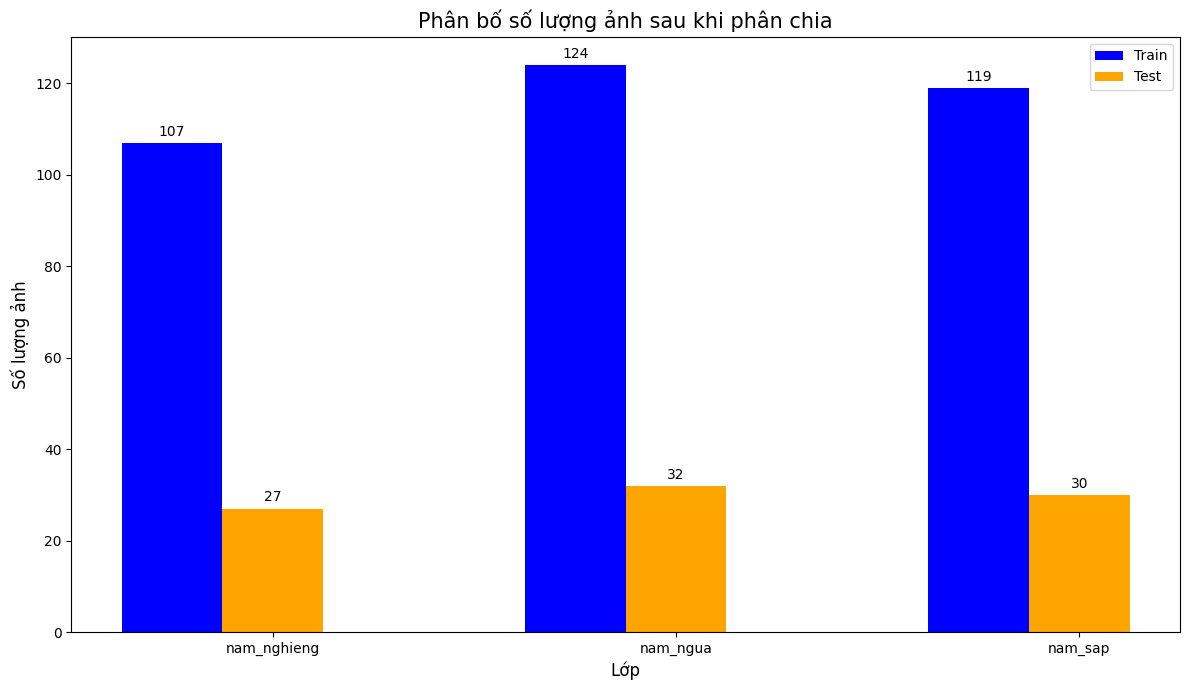

In [16]:
# Hiển thị biểu đồ phân bố dữ liệu sau khi phân chia
class_names = classes
x = np.arange(len(class_names))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))

# Dữ liệu cho mỗi split
train_counts = [split_counts['train'][class_name] for class_name in class_names]
# val_counts = [split_counts['val'][class_name] for class_name in class_names]
test_counts = [split_counts['test'][class_name] for class_name in class_names]

# Vẽ các thanh
train_bars = ax.bar(x - width, train_counts, width, label='Train', color='blue')
# val_bars = ax.bar(x, val_counts, width, label='Validation', color='green')
# test_bars = ax.bar(x + width, test_counts, width, label='Test', color='orange')
test_bars = ax.bar(x, test_counts, width, label='Test', color='orange')

# Thiết lập các thông số
ax.set_title('Phân bố số lượng ảnh sau khi phân chia', fontsize=15)
ax.set_xlabel('Lớp', fontsize=12)
ax.set_ylabel('Số lượng ảnh', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

# Thêm giá trị trên mỗi thanh
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    # xy=(bar.get_x() + bar.get_width() / 2, height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(train_bars)
# add_labels(val_bars)
add_labels(test_bars)

plt.tight_layout()
plt.show()

## Tóm tắt kết quả

Notebook đã thực hiện các công việc sau:

1. Đã đọc dữ liệu ảnh từ 3 thư mục: `nam_nghieng`, `nam_ngua`, `nam_sap`
2. Đã hiển thị số lượng ảnh trong mỗi thư mục
3. Đã chia dữ liệu thành tập train (80%), test (20%)
4. Đã tạo cấu trúc thư mục mới theo yêu cầu với các thư mục:
   - `data/train/nam_nghieng`, `data/train/nam_ngua`, `data/train/nam_sap`
   - `data/test/nam_nghieng`, `data/test/nam_ngua`, `data/test/nam_sap`
5. Đã sao chép các tệp ảnh vào các thư mục tương ứng

Cấu trúc thư mục kết quả như sau:
```
data/
  ├── train/
  │   ├── nam_nghieng/
  │   ├── nam_ngua/
  │   └── nam_sap/
  └── test/
      ├── nam_nghieng/
      ├── nam_ngua/
      └── nam_sap/
```